In [867]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [868]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')


In [869]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(n_points = 500, noise = 0.5, p_dims = 2)

In [870]:
def plot_classification_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , "^"]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [871]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

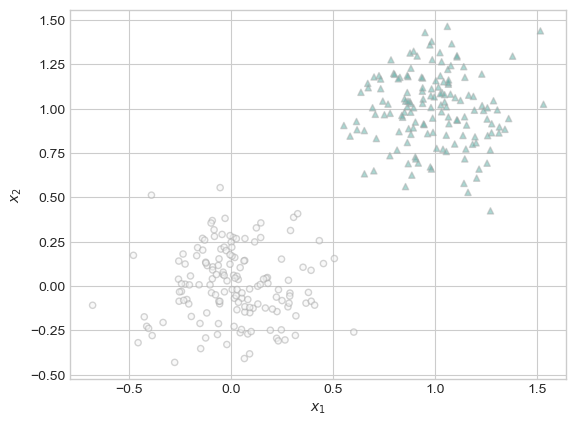

In [872]:
fig, ax = plt.subplots(1, 1)
X, y = classification_data()
plot_classification_data(X, y, ax)

# Experiment 1: Vanilla Gradient Descent

First, we initialize our model.

In [873]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

Here is the gradient descent loop, where the classification data has two dimensions, Alpha is sufficiently small, and Beta = 0.

In [874]:
loss_vec = []
for _ in range(2000):
    loss = opt.step(X, y, alpha = 0.1, beta = 0)
    loss_vec.append(loss)

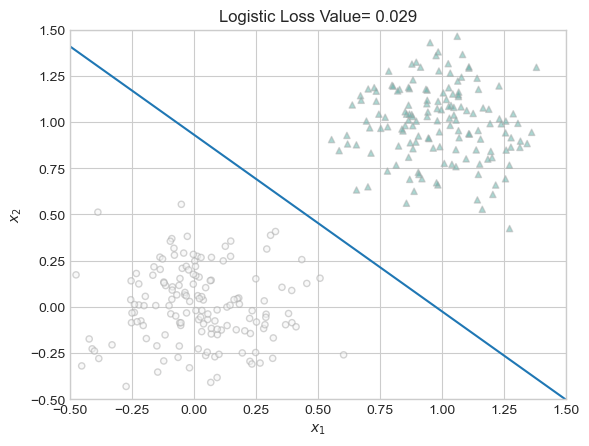

In [875]:
fig, ax = plt.subplots(1, 1)
opt_loss = loss_vec[len(loss_vec) - 1]
ax.grid(True)
ax.set_title(f"Logistic Loss Value= {opt_loss:.3f}")
ax.set(xlim = (-0.5, 1.5), ylim = (-0.5, 1.5))

plot_classification_data(X, y, ax)
draw_line(torch.clone(LR.w), -2, 2, ax)

Here, we can plot the decision boundary after 2000 iterations, which yields a loss value close to 0. The low loss value indicates our implementation of Logistic Regression is working. 

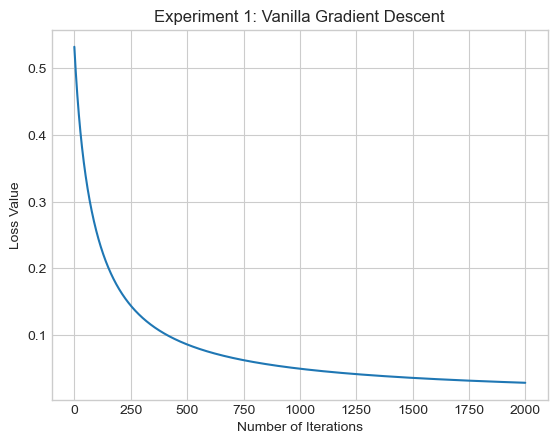

In [876]:
plt.plot(loss_vec)
labs = plt.gca().set(xlabel = "Number of Iterations", ylabel = "Loss Value", title = "Experiment 1: Vanilla Gradient Descent")

Here, we graph loss over the iterations where we see the loss decreases monotonically, further indicating the implementation of Part A is correct. 

# Experiment 2: Benefits of Momentum

In [877]:
MLR = LogisticRegression() 
Mopt = GradientDescentOptimizer(MLR)

In [878]:
Mloss_vec = []
for _ in range(2000):
    loss = Mopt.step(X, y, alpha = 0.2, beta = 0.9)
    Mloss_vec.append(loss)

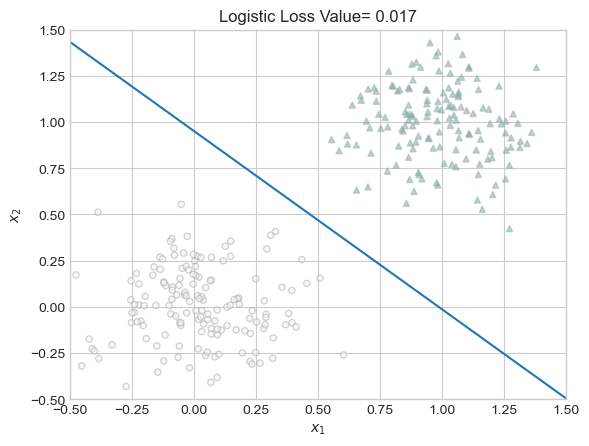

In [879]:
fig, ax = plt.subplots(1, 1)
opt_loss = Mloss_vec[len(Mloss_vec) - 1]
ax.grid(True)
ax.set_title(f"Logistic Loss Value= {opt_loss:.3f}")
ax.set(xlim = (-0.5, 1.5), ylim = (-0.5, 1.5))

plot_classification_data(X, y, ax)
draw_line(torch.clone(MLR.w), -2, 2, ax)

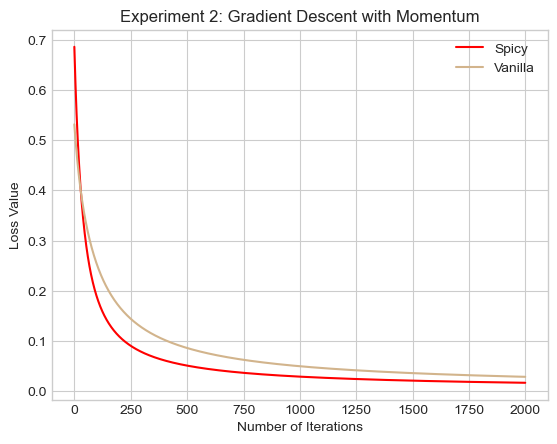

In [880]:
plt.plot(Mloss_vec, color = "red", label = "Spicy")
plt.plot(loss_vec, color = "tan", label = "Vanilla")
plt.legend()
labs = plt.gca().set(xlabel = "Number of Iterations", ylabel = "Loss Value", title = "Experiment 2: Gradient Descent with Momentum")

In the graph above, Gradient descent with momentum (Spicy converges to the correct weight vector faster than gradient descent without (Vanilla). Alpha was modified to 0.15 for Spicy, compared to 0.1 for Vanilla, in order to clearly show how Spicy Gradient Descent's loss value decreases quicker and converges sooner.

# Experiment 3: Overfitting

Accuracy function that calculates the accuracy of the LR model on the Overfitting data.

In [881]:
def calc_accuracy(model, X, y):
    accuracy = torch.mean((1.0 * (model.predict(X) == y)))
    return accuracy

Generating Train and Test datasets

In [882]:
X_train, y_train = classification_data(n_points = 50, noise = 0.2, p_dims = 100)

X_test, y_test = classification_data(n_points = 50, noise = 0.2, p_dims = 100)

In [883]:
OLR = LogisticRegression() 
Oopt = GradientDescentOptimizer(OLR)

In [884]:
Oloss_vec = []
Train_accuracy = []
Test_accuracy = []

for _ in range(2000):
    loss = Oopt.step(X_train, y_train, alpha = 0.2, beta = 0.9)
    Train_accuracy.append((1.0 * (OLR.predict(X_train) == y_train)).mean())
    Test_accuracy.append((1.0 * (OLR.predict(X_test) == y_test)).mean())
    Oloss_vec.append(loss)

Similar to keeping track of the loss value in the loss_vec, we store the accuracies of each iteration in arrays to then be graphed later. 

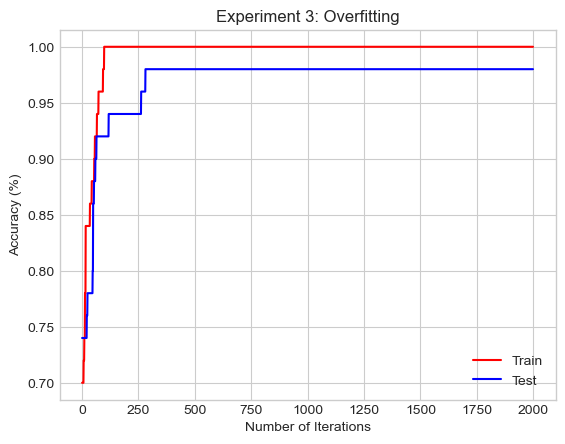

In [885]:
plt.plot(Train_accuracy, color = "red", label = "Train")
plt.plot(Test_accuracy, color = "blue", label = "Test")
plt.legend()
labs = plt.gca().set(xlabel = "Number of Iterations", ylabel = "Accuracy (%)", title = "Experiment 3: Overfitting")

Here we graph model accuracy, as a percentage, against the number of iterations. The experiment is entitled "Overfitting" so it is logical that the accuracy of the model test data is less than the 100% accuracy of the model on the training data, as illustrated above. 